# Snow's Cholera Map Redesign

In [13]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image               # to load images
from IPython.display import display # to display images
import folium
from shapely.geometry import Point, Polygon
from folium.plugins import FastMarkerCluster

## 1- Background Information


In 1854, when an epidemic of cholera erupted in the Golden Square of London, an anesthesiologist conducted various investigations to determine the origin of the epidemic. His name, Jhon Snow. According to the Center for Disease Control and Prevention (CDC), in the historical evolution of epidemiology, his analysis of this cholera outbreak has played a vital role in this field of study. But why Snow's findings from this epidemic are so important? Fahema Begum pointed out in an article from the Royal College of Surgeons of England in 2016 that in the nineteenth century, it was believed that the disease was transmitted and spread by a "bad air" or "bad smells" from rotting organic matter. However, Jhon Snow made several contributions in demonstrating that contaminated water was the real cause of the disease. With the help of the Reverend Henry Whitehead, Snow determined the source of the outbreak in 1854 was a contaminated public water pump located on Broad Street. He interviewed many neighbors of the affected area in London and mapped all mortalities from cholera. Among the deliverables of the study, Snow presented a map of the affected area with the number of deaths per house and all water pumps, becoming the most relevant and representative result from Snow's investigation.

The simplicity of the graph helped in understanding the outbreak and its origin (the pump on Broad Street). The CDC explained that his map style (figure 1), showing the geographic distribution of cases, is called a spot map nowadays and it is widely used.

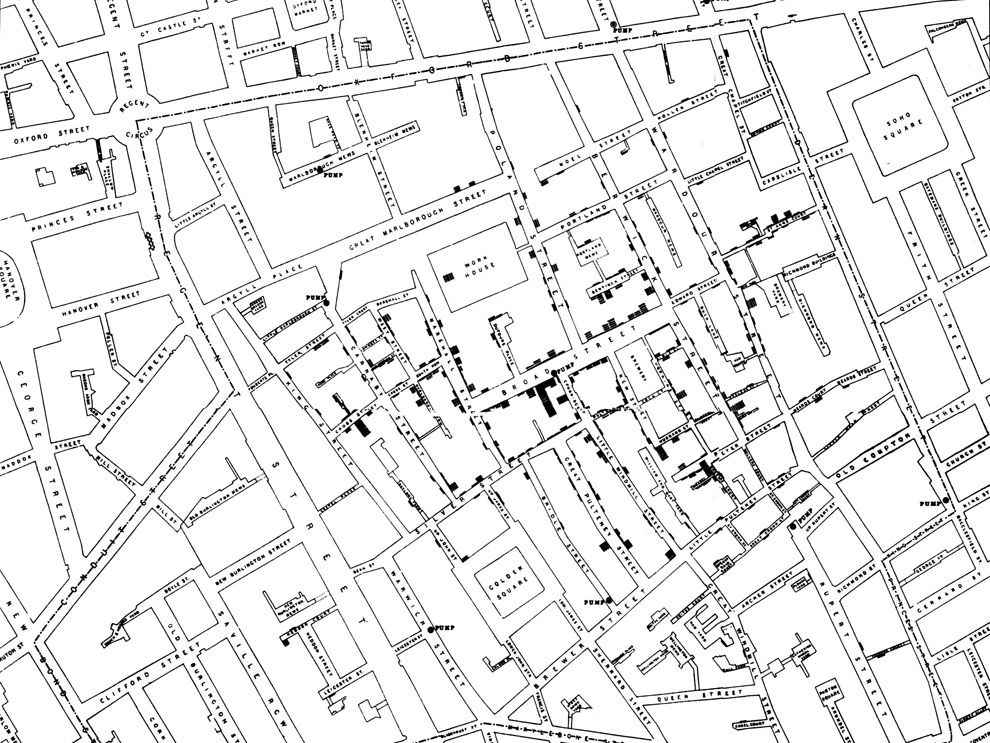

In [14]:
pil_img = Image.open('snow_map.jpg', 'r')
display(pil_img)

Figure 1. Snow's Cholera Map (Original)

## 2- Critical and Human-Centred approaches Snow's Cholera Map

This kind of map was not new at that time. As stated by Pete Warden in his blog article Visualization Myths Around Snow’s Cholera Map, The Sewer Commission created a similar map to track the same outbreak, but including more details such as sewer locations, old-grave sites, among others, saturating the map. But as mentioned before, the simplicity of the map was one of the most relevant factors for its success. Snow did a terrific job in keeping only the relevant information to demonstrate his theory. However, From a Human-Centred and Critical approach we can see that Snow's map version can be adapted to capture a greater audience. This redesign proposal will address two additional perspectives: 1) Regardless of the region, nation, or language, every person should be able to understand the general message of the map. 2) Making the more human-centred map.

### 2.1 Capturing a greater audience

Based on the different available sources about Snow's investigation, we see that most of the audience was local, so the probability of peolpe being familiarized with the Broad Street area as well as the water pumps was high. But, what if another audience wanted to undertand the situation such as another region or even a country? From figure 1, we can observe that identifying the pump locations as well as differenciating them from deaths is very difficult, even though all water pumps have the word "PUMP" next to it. Moreover, the color assigned to indicate a death or a pump is the same. Finally, the assumption is that all water pumps are of the same type. In figure 2, all water pumps have being highlighted to reinforce the argument about the need of some sort of contrast between deaths and pumps to allow a different audience to understand the issue.

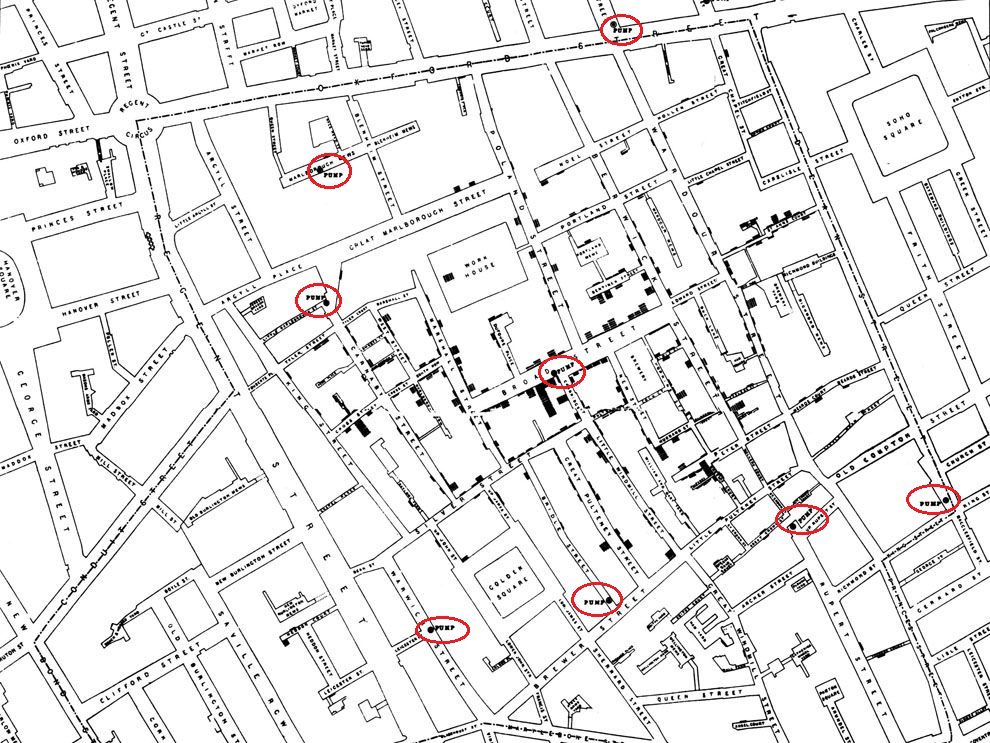

In [15]:
pil_img = Image.open('snow_map_pumps.jpg', 'r')
display(pil_img)

### 2.2 A more humanistic approach

Although it is true that Snow's map specified the exact location of the deaths, a more humanistic approach should take into account the demographics of all cases, including the relationships (fathers, mothers, children...) between all people who died in the outbreak.

## 3 - Redesign: Capturing a greater audience

To reach a broad audience, three proposed modifications to Snow's cholera map will be performed. First, to distinguish different values as well as population affected, color contrast will be used. Second, to differenciate pumps from deaths and illustrate which water pumps were used in the 1800s, icons will be added to the map. Finally, to have a better understanding of death counts and the most affected areas, aggregared values will be calculated per house, block, and zone. 

### 3.1 Preparing the data

To redesign the map, a dataset containing each death count and its corresponding geolocation will be used. Moreover, the geolocation of all water pumps in the sudy will all be added.

In [16]:
# Read in the data (make sure you download each file and place them in a "data" directory where your .ipynb is located)
deaths = pd.read_csv('data/deaths.csv')
pumps = pd.read_csv('data/pumps.csv')

#Print the head of your data
print(deaths.head())
print(pumps.head())

   death_count  x_latitude  y_longitude
0            1   51.513418    -0.137930
1            1   51.513418    -0.137930
2            1   51.513418    -0.137930
3            1   51.513361    -0.137883
4            1   51.513361    -0.137883
        pump_name  x_coordinate  y_coordinate
0       Broad St.     51.513341     -0.136668
1    Crown Chapel     51.513876     -0.139586
2  Gt Marlborough     51.514906     -0.139671
3        Dean St.     51.512354     -0.131630
4         So Soho     51.512139     -0.133594


In [17]:
# Create 'locations' variables by subsetting only Latitude and Longitude from the datasets 
locations_deaths = deaths[['x_latitude', 'y_longitude']]
locations_pumps = pumps[['x_coordinate', 'y_coordinate']]

# Transform the dataframes to list of lists 
deaths_list = locations_deaths[['x_latitude', 'y_longitude']].values.tolist()
pumps_list = locations_pumps[['x_coordinate', 'y_coordinate']].values.tolist()

### 3.2 Plotting deaths and pump locations including icons

This sketch plots all deaths and includes water pump icons to illustrate how pumps looked like.

In [18]:
# Use folium to plot your data on a realistic map of London 
# (change "tile" to try a different background and folium marker to try different methods of representation)
map = folium.Map(location=[51.5132119,-0.13666], tiles='CartoDB positron', zoom_start=17)

#Save water-pump icon path in a variable 
icon_path = "pump.png" #If you need to use a different path use "C:\Users\User\snow\pump.png"

for point in range(0, len(locations_deaths)):
    folium.CircleMarker(deaths_list[point], 
                        radius=8, color='black', fill=True, fill_color='black', opacity = 0.4).add_to(map)

map1 = map
for point in range(0, len(locations_pumps)):
    
    icon = folium.features.CustomIcon(icon_path,
                                          icon_size=(70, 50))
    
    folium.Marker(pumps_list[point], icon=icon, popup=pumps['pump_name'][point]).add_to(map1)

    
# Display the map
map1

### 3.3 Including color contrast

In this second sketch color contrast (red like color) is added to all 'death' points. It is now clear which are water pumps and where the deaths happened.

In [19]:
# Use folium to plot your data on a realistic map of London 
# (change "tile" to try a different background and folium marker to try different methods of representation)
map = folium.Map(location=[51.5132119,-0.13666], tiles='CartoDB positron', zoom_start=17)

#Save water-pump icon path in a variable 
icon_path = "pump.png" #If you need to use a different path use "C:\Users\User\snow\pump.png"

for point in range(0, len(locations_deaths)):
    folium.CircleMarker(deaths_list[point], 
                        radius=8, color='#FA8072', fill=True, fill_color='#FA8072', opacity = 0.4).add_to(map)

map2 = map

for point in range(0, len(locations_pumps)):
    
    icon = folium.features.CustomIcon(icon_path,
                                          icon_size=(70, 50))
    
    folium.Marker(pumps_list[point], icon=icon, popup=pumps['pump_name'][point]).add_to(map)

    
# Display the map
map2

In [20]:
# Use folium to plot your data on a realistic map of London 
# (change "tile" to try a different background and folium marker to try different methods of representation)
map = folium.Map(location=[51.5132119,-0.13666], tiles='CartoDB positron', zoom_start=17)

#Save water-pump icon path in a variable 
icon_path = "pump.png" #If you need to use a different path use "C:\Users\User\snow\pump.png"

for point in range(0, len(locations_deaths)):
    folium.CircleMarker(deaths_list[point], 
                        radius=8, color='#FA8072', fill=True, fill_color='#FA8072', opacity = 0.4).add_to(map)

map3 = map

for point in range(0, len(locations_pumps)):
    
    icon = folium.features.CustomIcon(icon_path,
                                          icon_size=(70, 50))
    
    folium.Marker(pumps_list[point], icon=icon, popup=pumps['pump_name'][point]).add_to(map)

FastMarkerCluster(data=list(zip(deaths['x_latitude'].values, deaths['y_longitude'].values))).add_to(map)
folium.LayerControl().add_to(map)
    
# Display the map
map3

## 4 - Redesign: Humanizing the map (dummy data)

To humanize Snow's map, the inclusion of demographic data is proposed. As an illustration, dummy date about name, gender, and age will be incorporated in the original dataset. The purpose of this approach is to demonstrate the importance of understanding the people who suffered from the outbreak, not as another number, but as a person. 

### 3.1 Preparing the data

The new dataset contains two additional columns gender and age. For gender column, 0 = female and 1 = male.

In [21]:
# Read in the data (make sure you download each file and place them in a "data" directory where your .ipynb is located)
deaths = pd.read_csv('data/deaths_mod.csv')
pumps = pd.read_csv('data/pumps.csv')

#Print the head of your data
print(deaths.head())
print(pumps.head())

   death_count  x_latitude  y_longitude  gender    age     name
0            1   51.513418    -0.137930       1  26-40  Peter 1
1            1   51.513418    -0.137930       1  41-50  Peter 2
2            1   51.513418    -0.137930       0  41-50   Sara 3
3            1   51.513361    -0.137883       1  26-40  Peter 4
4            1   51.513361    -0.137883       1     50  Peter 5
        pump_name  x_coordinate  y_coordinate
0       Broad St.     51.513341     -0.136668
1    Crown Chapel     51.513876     -0.139586
2  Gt Marlborough     51.514906     -0.139671
3        Dean St.     51.512354     -0.131630
4         So Soho     51.512139     -0.133594


To include new information to the map such as gender, we need to create new datasets that represents those subsets.

In [33]:
#Assign gender color in a new column
deaths.loc[deaths['gender'] == 0, 'gender_color'] = '#FA8072' 
deaths.loc[deaths['gender'] == 1, 'gender_color'] = '#3a5dbe' 

#Assign new variant for gender color in a new column
deaths.loc[deaths['gender'] == 0, 'gender_color2'] = 'pink' 
deaths.loc[deaths['gender'] == 1, 'gender_color2'] = 'lightblue'

#Create male and female datasets
female_deaths = deaths.loc[deaths['gender'] == 0].reset_index()
male_deaths = deaths.loc[deaths['gender'] == 1].reset_index()

# Create 'locations' variables by subsetting only Latitude and Longitude from the datasets 
locations_deaths_female = female_deaths[['x_latitude', 'y_longitude']]
locations_deaths_male = male_deaths[['x_latitude', 'y_longitude']]

locations_pumps = pumps[['x_coordinate', 'y_coordinate']]

# Transform the dataframes to list of lists 
deaths_list_female = locations_deaths_female[['x_latitude', 'y_longitude']].values.tolist()
deaths_list_male = locations_deaths_male[['x_latitude', 'y_longitude']].values.tolist()
pumps_list = locations_pumps[['x_coordinate', 'y_coordinate']].values.tolist()


### 4.2 Including gender in the map and demographic info as popup window

Once we have the dataset classified by gender, the following map will allow to understand the persons affected by the epidemic. Based on the results, it seems the outbreak does not target a specific gender, as it is shown in the map. This new approach offers a different facet of Snow's investigation. Apart from improvements in readbility, it can also be 

In [34]:
# Use folium to plot your data on a realistic map of London 
# (change "tile" to try a different background and folium marker to try different methods of representation)
map = folium.Map(location=[51.5132119,-0.13666], tiles='CartoDB positron', zoom_start=17)

#Save water-pump icon path in a variable 
icon_path = "pump.png" #If you need to use a different path use "C:\Users\User\snow\pump.png"

for point in range(0, len(locations_deaths_female)):
    folium.CircleMarker(deaths_list_female[point], 
                        popup='Name:'+female_deaths['name'][point]+' Age:'+female_deaths['age'][point],
                        radius=8, color=female_deaths["gender_color"][point], fill=True, fill_color=female_deaths["gender_color"][point], opacity = 0.4).add_to(map)

for point in range(0, len(locations_deaths_male)):
    folium.CircleMarker(deaths_list_male[point], 
                        popup='Name:'+male_deaths['name'][point]+' Age:'+male_deaths['age'][point],
                        radius=8, color=male_deaths["gender_color"][point], fill=True, fill_color=male_deaths["gender_color"][point], opacity = 0.4).add_to(map)

    

for point in range(0, len(locations_pumps)):
    
    icon = folium.features.CustomIcon(icon_path,
                                          icon_size=(70, 50))
    
    folium.Marker(pumps_list[point], icon=icon, popup=pumps['pump_name'][point]).add_to(map)


FastMarkerCluster(data=list(zip(deaths['x_latitude'].values, deaths['y_longitude'].values))).add_to(map)
folium.LayerControl().add_to(map)

map4 = map


# Display the map
map4

In [27]:
# Use folium to plot your data on a realistic map of London 
# (change "tile" to try a different background and folium marker to try different methods of representation)
map = folium.Map(location=[51.5132119,-0.13666], tiles='CartoDB positron', zoom_start=17)

#Save water-pump icon path in a variable 
icon_path = "pump.png" #If you need to use a different path use "C:\Users\User\snow\pump.png"

for point in range(0, len(locations_deaths_female)):
    folium.Marker(deaths_list_female[point], 
                  popup='Name:'+female_deaths['name'][point]+' Age:'+female_deaths['age'][point], 
                  icon=folium.Icon(color=female_deaths["gender_color2"][point], 
                                   icon_color='white', icon='female', angle=0, prefix='fa')).add_to(map)

for point in range(0, len(locations_deaths_male)):
    folium.Marker(deaths_list_male[point], 
                  popup='Name:'+male_deaths['name'][point]+' Age:'+male_deaths['age'][point], 
                  icon=folium.Icon(color=male_deaths["gender_color2"][point], 
                                   icon_color='white', icon='male', angle=0, prefix='fa')).add_to(map)

    
for point in range(0, len(locations_pumps)):
    
    icon = folium.features.CustomIcon(icon_path,
                                          icon_size=(70, 50))
    
    folium.Marker(pumps_list[point], icon=icon, popup=pumps['pump_name'][point]).add_to(map)


FastMarkerCluster(data=list(zip(deaths['x_latitude'].values, deaths['y_longitude'].values))).add_to(map)
folium.LayerControl().add_to(map)

map5 = map

# Display the map
map5

## 5 - Conclusions